In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#load csv data in dataframe

pull_happy = "../Data/World Happiness 2016.csv"

happy = pd.read_csv(pull_happy)


In [3]:
pull_region = "../Data/Country Region.csv"

Region = pd.read_csv(pull_region)
Region.head()
C_rename4 = {"Bolivia (Plurinational State of)":"Bolivia","Iran (Islamic Republic of)":"Iran","Cote d'Ivoire":"Ivory Coast",
"China, Hong Kong SAR":"Hong Kong","Lao People's Democratic Republic":"Laos","Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"Macedonia","Russian Federation":"Russia",
"Republic of Korea":"South Korea","Republic of Moldova":"Moldova","United Kingdom of Great Britain":"United Kingdom",
"United Republic of Tanzania":"Tanzania","United States of America":"United States","Viet Nam":"Vietnam",
"Venezuela (Bolivarian Republic of)":"Venezuela"}
Region2 = Region.replace(C_rename4)
happy_region = pd.merge(happy, Region2, how = "left")
happy_region.count()
output_data_file = "Happy_Region.csv"
happy_region.to_csv(output_data_file, index=False)


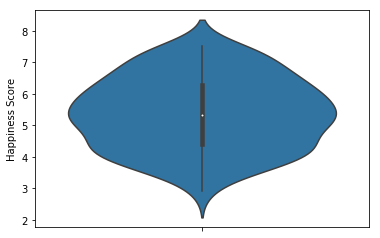

In [4]:
import seaborn as sns
ax = sns.violinplot(y=happy["Happiness Score"])

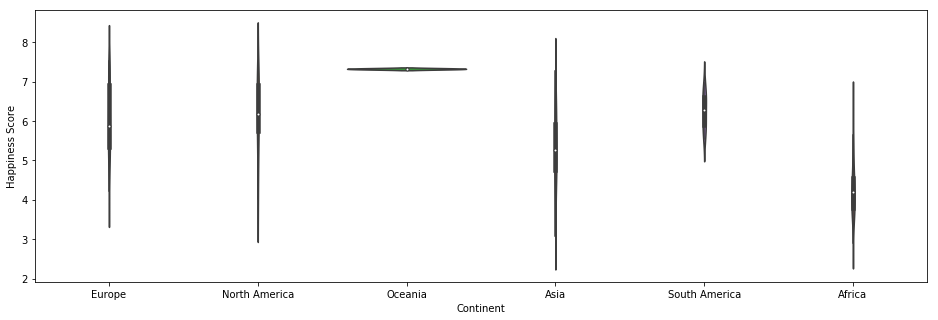

In [5]:
fig_cont, ax_cont = plt.subplots(figsize = (16,5))
ax_cont = sns.violinplot(x = "Continent",y = "Happiness Score", data = happy_region)

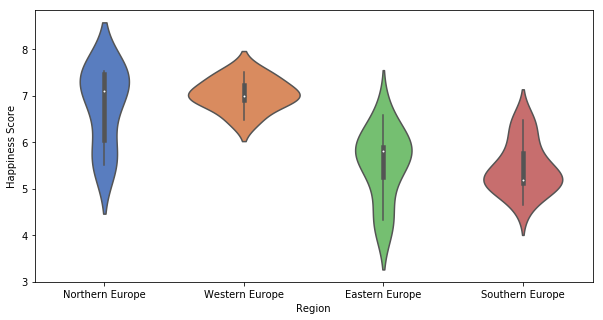

In [6]:
happy_eu = happy_region[happy_region["Continent"] == "Europe"]
fig_eu, ax_eu = plt.subplots(figsize = (10,5))
ax_eu = sns.violinplot(x = "Region",y = "Happiness Score", data = happy_eu,palette="muted")

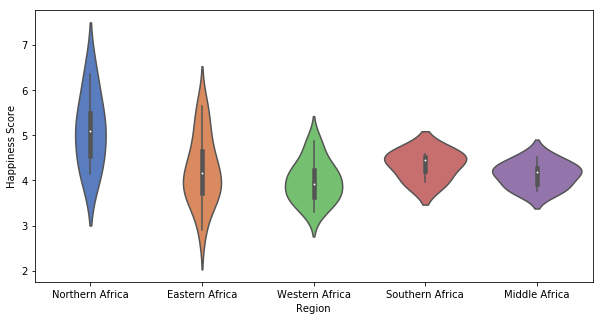

In [7]:
happy_africa = happy_region[happy_region["Continent"] == "Africa"]
fig_africa, ax_africa = plt.subplots(figsize = (10,5))
ax_africa = sns.violinplot(x = "Region",y = "Happiness Score", data = happy_africa,palette="muted")

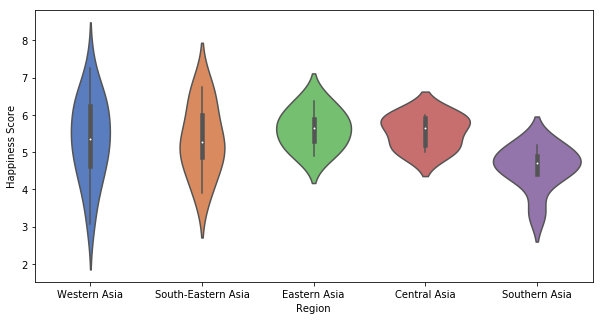

In [8]:
happy_asia = happy_region[happy_region["Continent"] == "Asia"]
fig_asia, ax_asia = plt.subplots(figsize = (10,5))
ax_asia = sns.violinplot(x = "Region",y = "Happiness Score", data = happy_asia,palette="muted")

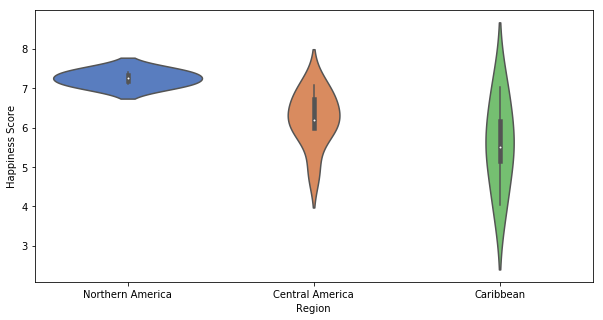

In [9]:
happy_NA = happy_region[happy_region["Continent"] == "North America"]
fig_NA, ax_NA = plt.subplots(figsize = (10,5))
ax_NA = sns.violinplot(x = "Region",y = "Happiness Score", data = happy_NA,palette="muted")

In [12]:
pull_coord = "../Clean Data/CoordinatesClean.csv"

Coord = pd.read_csv(pull_coord)
C_rename3 = {"Congo [Republic]":"Congo (Brazzaville)","Congo [DRC]":"Congo (Kinshasa)","Cote d'Ivoire":"Ivory Coast",
"Macedonia [FYROM]":"Macedonia","Myanmar [Burma]":"Myanmar"}
Coord2 = Coord.replace(C_rename3)
happy_region_coord = pd.merge(happy_region, Coord2, how = "inner")

output_data_file = "Happy_Region_Coord.csv"
happy_region_coord.to_csv(output_data_file, index=False)
happy_region_coord.count()


Country            154
Happiness Rank     154
Happiness Score    154
Region             154
Continent          154
Latitude           154
Longitude          154
dtype: int64

Text(0, 0.5, 'Longitude')

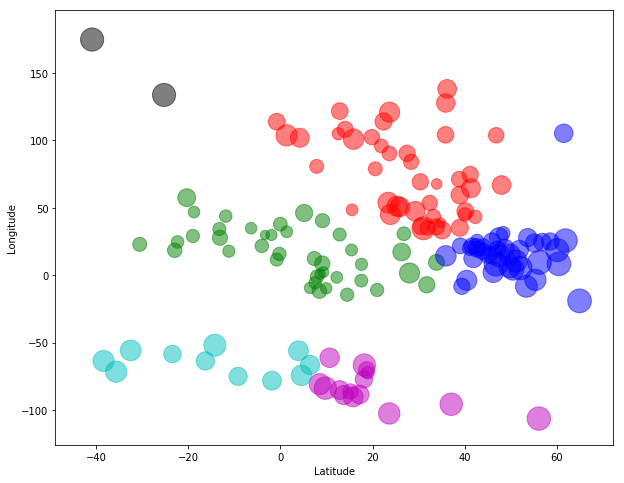

In [13]:
hrs_asia = happy_region_coord[happy_region_coord["Continent"]=="Asia"]
hrs_africa = happy_region_coord[happy_region_coord["Continent"]=="Africa"]
hrs_europe = happy_region_coord[happy_region_coord["Continent"]=="Europe"]
hrs_NA = happy_region_coord[happy_region_coord["Continent"]=="North America"]
hrs_SA = happy_region_coord[happy_region_coord["Continent"]=="South America"]
hrs_oceania = happy_region_coord[happy_region_coord["Continent"]=="Oceania"]

fig_scatter, ax_scatter = plt.subplots(figsize = (10,8))
ax_scatter.scatter(hrs_asia["Latitude"],hrs_asia["Longitude"], color = "r", s = (10*hrs_asia["Happiness Score"]**2), alpha = .5)
ax_scatter.scatter(hrs_africa["Latitude"],hrs_africa["Longitude"], color = "g",s = (10*hrs_africa["Happiness Score"]**2), alpha = .5)
ax_scatter.scatter(hrs_europe["Latitude"],hrs_europe["Longitude"], color = "b",s = (10*hrs_europe["Happiness Score"]**2), alpha = .5)
ax_scatter.scatter(hrs_NA["Latitude"],hrs_NA["Longitude"], color = "m", s = (10*hrs_NA["Happiness Score"]**2), alpha = .5)
ax_scatter.scatter(hrs_SA["Latitude"],hrs_SA["Longitude"], color = "c",s = (10*hrs_SA["Happiness Score"]**2), alpha = .5)
ax_scatter.scatter(hrs_oceania["Latitude"],hrs_oceania["Longitude"], color = "k",s = (10*hrs_oceania["Happiness Score"]**2), alpha = .5)
ax_scatter.set_xlabel("Latitude")
ax_scatter.set_ylabel("Longitude")
#happy_WAsia = happy_region_coord[happy_region_coord["Region"] == "Western Asia"]#
#fig_WAsia, ax_WAsia = plt.subplots(figsize = (10,5))
#plt.scatter(happy_region_coord["Latitude"])
#ax_WAsia = sns.violinplot(x = "Country",y = "Happiness Score", data = happy_WAsia,palette="muted")

In [15]:
import scipy.stats as stats
stats.f_oneway(hrs_asia["Happiness Score"],hrs_africa["Happiness Score"],hrs_europe["Happiness Score"],hrs_NA["Happiness Score"],hrs_SA["Happiness Score"],hrs_oceania["Happiness Score"])

F_onewayResult(statistic=27.12975747142343, pvalue=2.0586808394959032e-19)

In [26]:
#pairwise comparisons

stat,p =stats.ttest_ind(hrs_asia["Happiness Score"],hrs_africa["Happiness Score"], equal_var=False)
print(f'Asia vs Africa: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_asia["Happiness Score"],hrs_europe["Happiness Score"], equal_var=False)
print(f'Asia vs Europe: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_asia["Happiness Score"],hrs_NA["Happiness Score"], equal_var=False)
print(f'Asia vs NA: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_asia["Happiness Score"],hrs_SA["Happiness Score"], equal_var=False)
print(f'Asia vs SA: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_asia["Happiness Score"],hrs_oceania["Happiness Score"], equal_var=False)
print(f'Asia vs Oceania: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_africa["Happiness Score"],hrs_europe["Happiness Score"], equal_var=False)
print(f'Africa vs Europe: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_africa["Happiness Score"],hrs_NA["Happiness Score"], equal_var=False)
print(f'Africa vs NA: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_africa["Happiness Score"],hrs_SA["Happiness Score"], equal_var=False)
print(f'Africa vs SA: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_africa["Happiness Score"],hrs_oceania["Happiness Score"], equal_var=False)
print(f'Africa vs Oceania: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_europe["Happiness Score"],hrs_NA["Happiness Score"], equal_var=False)
print(f'Europe vs NA: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_europe["Happiness Score"],hrs_SA["Happiness Score"], equal_var=False)
print(f'Europe vs SA: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_europe["Happiness Score"],hrs_oceania["Happiness Score"], equal_var=False)
print(f'Europe vs Oceania: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_NA["Happiness Score"],hrs_SA["Happiness Score"], equal_var=False)
print(f'NA vs SA: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_NA["Happiness Score"],hrs_oceania["Happiness Score"], equal_var=False)
print(f'NA vs Oceania: Test statistic {stat}, P-Value {p}')
stat,p =stats.ttest_ind(hrs_SA["Happiness Score"],hrs_oceania["Happiness Score"], equal_var=False)
print(f'SA vs Oceania: Test statistic {stat}, P-Value {p}')

Asia vs Africa: Test statistic 5.771582459564146, P-Value 1.374394987792943e-07
Asia vs Europe: Test statistic -4.056925054214344, P-Value 0.00011396320684386133
Asia vs NA: Test statistic -3.1733542005501074, P-Value 0.0042052050302949315
Asia vs SA: Test statistic -5.154939085727353, P-Value 1.2461954682822747e-05
Asia vs Oceania: Test statistic -15.209918406655557, P-Value 3.101287305539029e-19
Africa vs Europe: Test statistic -9.84643608079607, P-Value 6.433204081837246e-15
Africa vs NA: Test statistic -7.061119434666155, P-Value 8.243324189294668e-07
Africa vs SA: Test statistic -11.437428308832734, P-Value 3.4639250831522816e-11
Africa vs Oceania: Test statistic -28.32925463028575, P-Value 2.257998325121837e-28
Europe vs NA: Test statistic -0.2308427710477785, P-Value 0.8192955220630782
Europe vs SA: Test statistic -0.8473777753053748, P-Value 0.4024745697005866
Europe vs Oceania: Test statistic -8.282010068982244, P-Value 3.733539911500903e-10
NA vs SA: Test statistic -0.3782108

In [18]:
stats.ttest_ind(hrs_oceania["Happiness Score"],hrs_africa["Happiness Score"], equal_var=False)

Ttest_indResult(statistic=28.32925463028575, pvalue=2.257998325121837e-28)

In [ ]:
happy_region_coord["Happy Category"]